## Lab 3:
# Advanced Net

Виконала: Балацька Вікторія ФІ-52мн

Підготовка середовища

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from google.colab import files

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


ЗАВДАННЯ 1

Завантаження й попередня обробка даних

In [11]:
file_names = [
    "Franko_-Zibrannya-tvoriv-u-p-y…txt",
    "Franko_Ivan-Franko-pro-Grigori…txt",
    "Lisova_pisnya_1371650989.txt",
    "Lys_mykita.txt"
]

for fname in txt_files:
    path = os.path.join("/content", fname)
    with open(path, "r", encoding="utf-8") as f:
        all_texts.append(f.read())

text = "\n".join(all_texts)

print("\n The len of text: ", len(text))
print("\nThe first 500 symb:")
print(text[:500])

text = text.replace('\r', ' ')
text = text.replace('\n', ' ')
text = text.lower()

print("Text:")
print(text[:1000])


 The len of text:  3952085

The first 500 symb:
﻿   
   
  Іван Франко о Григории Сковороде
   
   СОЧИНЕНИЯ ГРИГОРИЯ САВВИЧА СКОВОРОДЫ,
   собранные и редактированные проф. Д. И. Багалеем. Юбилейное издание (1794—1894 год), с портретом его, видом могилы и снимками почерка. 7-й т. Сборника Харьковского]	ист[орико]-фил [алогического]	общества].
   Харків, 1894, стор. 14 ненумГерованих] + СХХХ1 + + 132 + 352
   Григорій Сковорода — поява вельми замітна в історії розвою українського народу, мабуть, чи не найза- мітніша з усіх духових діячів наши
Text:
﻿          іван франко о григории сковороде        сочинения григория саввича сковороды,    собранные и редактированные проф. д. и. багалеем. юбилейное издание (1794—1894 год), с портретом его, видом могилы и снимками почерка. 7-й т. сборника харьковского]	ист[орико]-фил [алогического]	общества].    харків, 1894, стор. 14 ненумгерованих] + сххх1 + + 132 + 352    григорій сковорода — поява вельми замітна в історії розвою українського народу,

Підготовка словника символів і навчальних прикладів

Створюємо словник символів

In [12]:
chars = sorted(list(set(text)))
vocab_size = len(chars)
print("The number of unique symbols:", vocab_size)
print("Sumbols:", chars)

The number of unique symbols: 121
Sumbols: ['\t', ' ', '!', '"', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '>', '?', '[', '\\', ']', '^', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '~', '\xa0', '£', '§', '©', '«', '°', '»', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё', 'є', 'і', 'ї', 'ј', 'ґ', '–', '—', '‘', '’', '„', '•', '…', '€', '№', '■', '\ufeff']


Відображення символ ↔ індекс

In [13]:
char2idx = {c: i for i, c in enumerate(chars)}
idx2char = {i: c for i, c in enumerate(chars)}

In [14]:
seq_length = 100
step = 1

sequences = []
next_chars = []

for i in range(0, len(text) - seq_length, step):
    sequences.append(text[i : i + seq_length])
    next_chars.append(text[i + seq_length])

print("The number of examples:", len(sequences))

The number of examples: 3951985


Щоб не "вбити" пам'ять, обмежимо кількість прикладів

In [15]:
max_sequences = 100000
if len(sequences) > max_sequences:
    sequences = sequences[:max_sequences]
    next_chars = next_chars[:max_sequences]
    print("Truncated to ", max_sequences, "sequnces")


Truncated to  100000 sequnces


Перетворюємо в масиви індексів

In [16]:
X = np.zeros((len(sequences), seq_length), dtype=np.int32)
y = np.zeros((len(sequences),), dtype=np.int32)

for i, seq in enumerate(sequences):
    X[i] = [char2idx[c] for c in seq]
    y[i] = char2idx[next_chars[i]]

print("Form X:", X.shape)
print("Form y:", y.shape)


Form X: (100000, 100)
Form y: (100000,)


Побудова моделі LSTM

In [17]:
embedding_dim = 64
lstm_units = 128

model = models.Sequential([
    layers.Embedding(input_dim=vocab_size,
                     output_dim=embedding_dim,
                     input_length=seq_length),
    layers.LSTM(lstm_units),
    layers.Dense(vocab_size, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam'
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Навчання моделі

In [18]:
batch_size = 128
epochs = 10

history = model.fit(
    X, y,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1
)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 221s 310ms/step - loss: 3.2811 - val_loss: 2.6487
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 224s 318ms/step - loss: 2.6211 - val_loss: 2.5261
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 258s 312ms/step - loss: 2.4925 - val_loss: 2.4277
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 223s 317ms/step - loss: 2.3891 - val_loss: 2.3636
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 220s 312ms/step - loss: 2.3152 - val_loss: 2.2921
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 262s 312ms/step - loss: 2.2457 - val_loss: 2.2591
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 223s 316ms/step - loss: 2.1825 - val_loss: 2.2206
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 260s 313ms/step - loss: 2.1365 - val_loss: 2.1918
Epoch 9/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 223s 317ms/step - loss: 2.0967 - val_loss: 2.1735
Epoch 10/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 220s 312ms/step - loss: 2.0539 - val_loss: 2.1437


Функції для семплінгу й генерації тексту

In [19]:
def sample_with_temperature(preds, temperature=1.0):
    preds = np.asarray(preds).astype("float64")
    preds = np.log(preds + 1e-8) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)


def generate_text(model, start_string, length=400, temperature=0.8):
    start_string = start_string.lower()
    input_indices = [char2idx.get(c, 0) for c in start_string]

    if len(input_indices) > seq_length:
        input_indices = input_indices[-seq_length:]
    else:
        input_indices = [0] * (seq_length - len(input_indices)) + input_indices

    generated = start_string

    for _ in range(length):
        x = np.array(input_indices)[None, :]
        preds = model.predict(x, verbose=0)[0]
        next_index = sample_with_temperature(preds, temperature)
        next_char = idx2char[next_index]

        generated += next_char

        input_indices = input_indices[1:] + [next_index]

    return generated


Приклади генерації українського тексту

In [30]:
seed_texts = [
    "Лис Микита",
    "Григорій Сковорода",
    "Ой леле!"
]

for seed in seed_texts:
    print("=" * 80)
    print("Initial phrase:", seed)
    print("-" * 80)
    generated = generate_text(model, start_string=seed, length=400, temperature=0.8)
    print(generated)
    print()


Initial phrase: Лис Микита
--------------------------------------------------------------------------------
лис микита з не готрудат вського добуробний ментатої справодий все мишникого уладіл, про і звіч голь пісновіння, а бульшу на у на провино під так де житств.    у свій догляреницького вже ная у і місці,      ідостор від фіячський не віршу або ті друковного не не іншами перзаємо, що стародуви, як в 174—197, кирезакичного та церкрать, але накодения не знандовська в з під таки до він васлід «сторитом тут мосці,

Initial phrase: Григорій Сковорода
--------------------------------------------------------------------------------
григорій сковородання, що в тух дипив упрофенською. завсковську жалося дварацістть 1638 р., бе, а гогориту буперативого осленовара бобурши харенацент.     нешкової с.69, змавсична він череніе сеїмі радом*, колечати у видині і свого і гершем, а та іна дво разковій аб в’яго, коні, дрендри правчернами народильна знасали 18 редаку піденумів «же т-бер старенторостія 

ЗАВДАННЯ 2

In [22]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import time


Завантаження та підготовка датасету Fashion MNIST

In [31]:
(fashion_train_images, _), (_, _) = tf.keras.datasets.fashion_mnist.load_data()

print("Form train:", fashion_train_images.shape)

Form train: (60000, 28, 28)


In [32]:
fashion_train_images = fashion_train_images.astype("float32")
fashion_train_images = (fashion_train_images - 127.5) / 127.5
fashion_train_images = np.expand_dims(fashion_train_images, axis=-1)

N_SAMPLES = 10000
fashion_train_images = fashion_train_images[:N_SAMPLES]

BUFFER_SIZE = N_SAMPLES
BATCH_SIZE = 64

train_dataset = (
    tf.data.Dataset.from_tensor_slices(fashion_train_images)
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE)
)

Модель генератора

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 12544)          │     1,254,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 12544)          │        50,176 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_6              │ (None, 7, 7, 128)      │       819,200 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_7              │ (None, 14, 14, 64)     │       204,800 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_8              │ (None, 28, 28, 1)      │         1,600 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,330,944 (8.89 MB)

 Trainable params: 2,305,472 (8.79 MB)

 Non-trainable params: 25,472 (99.50 KB)

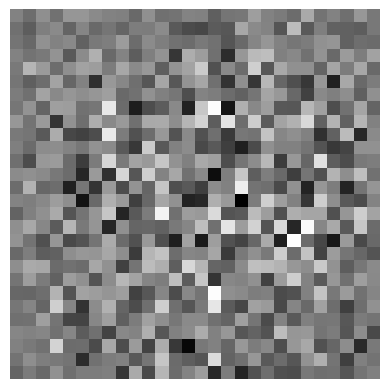

In [34]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7 * 7 * 256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1),
                                     padding="same", use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2),
                                     padding="same", use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2),
                                     padding="same", use_bias=False,
                                     activation="tanh"))

    return model

generator = make_generator_model()
generator.summary()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)
plt.imshow(generated_image[0, :, :, 0] * 0.5 + 0.5, cmap="gray")
plt.axis("off")
plt.show()


Модель дискримінатора

In [35]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2),
                            padding="same",
                            input_shape=(28, 28, 1)))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding="same"))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

discriminator = make_discriminator_model()
discriminator.summary()

decision = discriminator(generated_image)
print("Discriminator output (logit):", decision.numpy())


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_12 (LeakyReLU)      │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │         6,273 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 212,865 (831.50 KB)

 Trainable params: 212,865 (831.50 KB)

 Non-trainable params: 0 (0.00 B)

Discriminator output (logit): [[0.00427569]]


Функції втрат і оптимізатори

In [36]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)


Цикл навчання DCGAN

Епоха 1/10 - gen_loss: 0.6383, disc_loss: 1.2273, time: 129.7 c


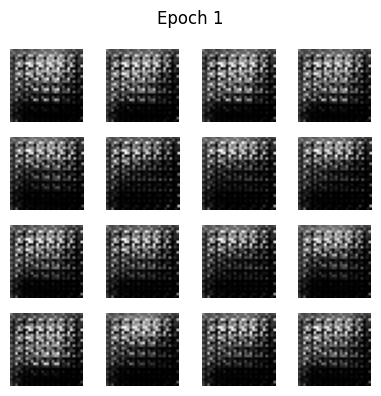

Епоха 2/10 - gen_loss: 0.7860, disc_loss: 1.2428, time: 124.7 c


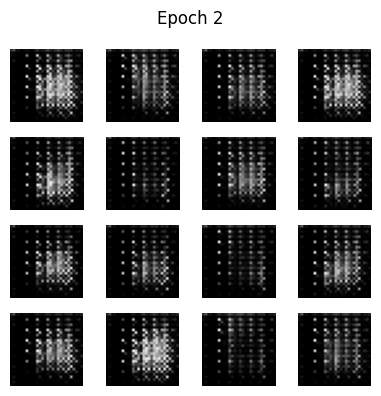

Епоха 3/10 - gen_loss: 0.9684, disc_loss: 1.0716, time: 126.6 c


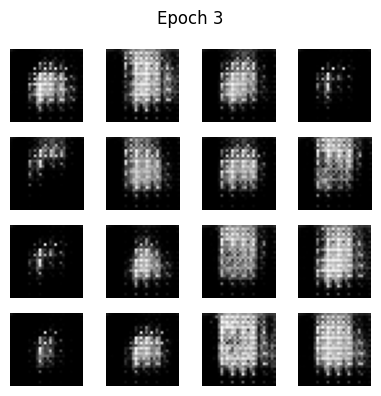

Епоха 4/10 - gen_loss: 0.8408, disc_loss: 1.3703, time: 124.5 c


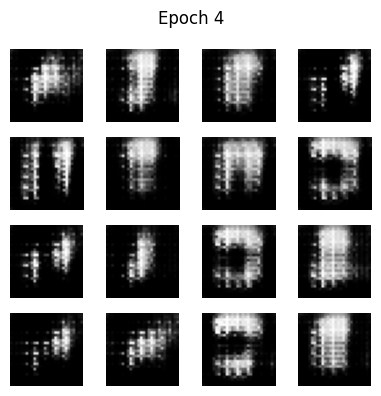

Епоха 5/10 - gen_loss: 0.8368, disc_loss: 1.2877, time: 126.7 c


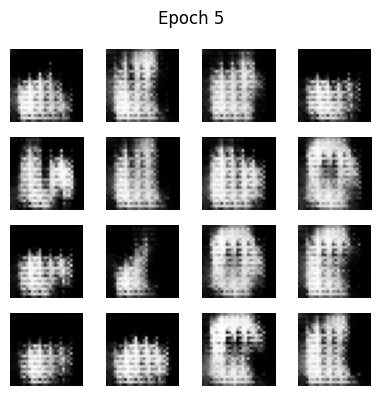

Епоха 6/10 - gen_loss: 0.8337, disc_loss: 1.2497, time: 124.5 c


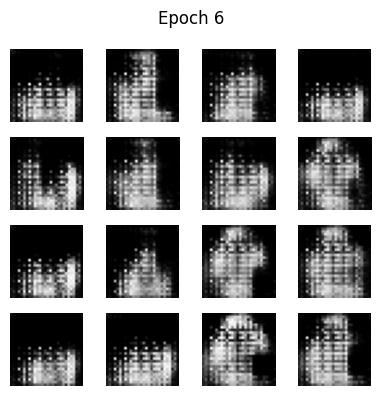

Епоха 7/10 - gen_loss: 0.8739, disc_loss: 1.2641, time: 126.6 c


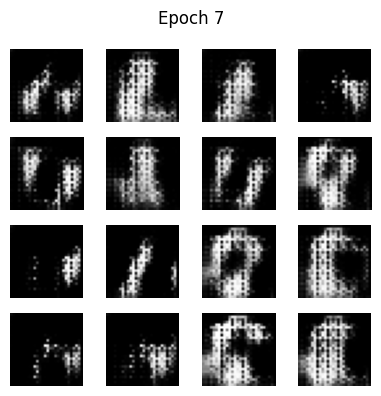

Епоха 8/10 - gen_loss: 0.8230, disc_loss: 1.3345, time: 141.9 c


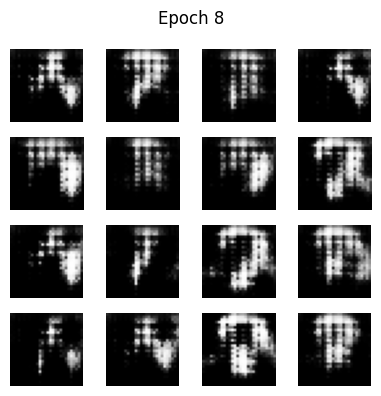

Епоха 9/10 - gen_loss: 0.8158, disc_loss: 1.2786, time: 124.3 c


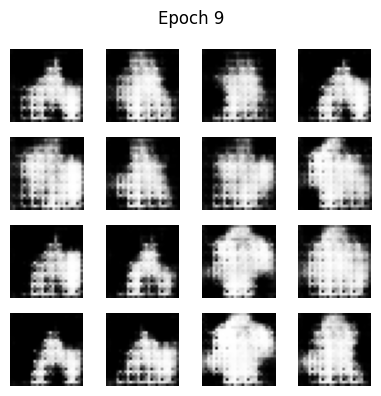

Епоха 10/10 - gen_loss: 0.8332, disc_loss: 1.3111, time: 126.4 c


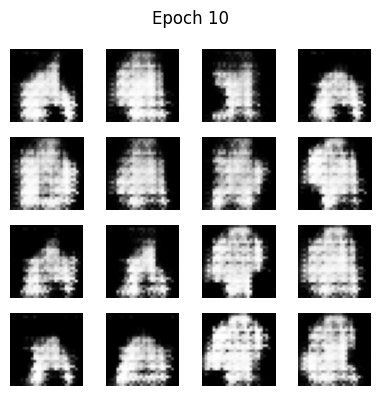

In [37]:
EPOCHS = 10
noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])

@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss,
                                               generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss,
                                                    discriminator.trainable_variables)

    generator_optimizer.apply_gradients(
        zip(gradients_of_generator, generator.trainable_variables)
    )
    discriminator_optimizer.apply_gradients(
        zip(gradients_of_discriminator, discriminator.trainable_variables)
    )

    return gen_loss, disc_loss


def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    predictions = (predictions * 0.5) + 0.5

    plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(predictions[i, :, :, 0], cmap="gray")
        plt.axis("off")

    plt.suptitle(f"Epoch {epoch}")
    plt.tight_layout()
    plt.show()


def train(dataset, epochs):
    for epoch in range(1, epochs + 1):
        start = time.time()

        gen_losses = []
        disc_losses = []

        for image_batch in dataset:
            g_loss, d_loss = train_step(image_batch)
            gen_losses.append(g_loss.numpy())
            disc_losses.append(d_loss.numpy())

        print(f"Епоха {epoch}/{epochs} - "
              f"gen_loss: {np.mean(gen_losses):.4f}, "
              f"disc_loss: {np.mean(disc_losses):.4f}, "
              f"time: {time.time() - start:.1f} c")

        generate_and_save_images(generator, epoch, seed)

train(train_dataset, EPOCHS)


Генерація нових зображень після навчання

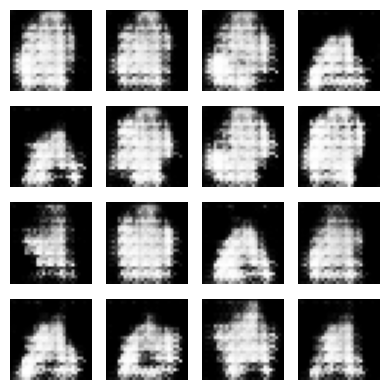

In [39]:
noise = tf.random.normal([16, noise_dim])
generated_images = generator(noise, training=False)
generated_images = generated_images * 0.5 + 0.5

plt.figure(figsize=(4, 4))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(generated_images[i, :, :, 0], cmap="gray")
    plt.axis("off")
plt.tight_layout()
plt.show()

ЗАВДАННЯ 3

а) Класифікація  датасету spotify.csv через Hugging Face pipeline

In [40]:
import pandas as pd

df = pd.read_csv("spotify.csv")
print(df.head())
print(df['label'].value_counts())


                                              Review     label
0  Great music service, the audio is high quality...  POSITIVE
1  Please ignore previous negative rating. This a...  POSITIVE
2  This pop-up "Get the best Spotify experience o...  NEGATIVE
3    Really buggy and terrible to use as of recently  NEGATIVE
4  Dear Spotify why do I get songs that I didn't ...  NEGATIVE
label
NEGATIVE    29423
POSITIVE    23279
Name: count, dtype: int64


Train / test split

In [55]:
X = df["Review"].values
y = df["label"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
print("Train size:", len(X_train))
print("Test size:", len(X_test))

Train size: 42161
Test size: 10541


In [57]:
MAX_TEST_SAMPLES = 200
X_test_small = X_test[:MAX_TEST_SAMPLES].astype(str)
y_test_small = y_test[:MAX_TEST_SAMPLES]
print("Використовуємо для оцінки N =", len(X_test_small))

Використовуємо для оцінки N = 200


In [58]:
pipe_distilbert = pipeline(
    "text-classification",
    model="distilbert-base-uncased-finetuned-sst-2-english",
    truncation=True
)

pipe_multilingual = pipeline(
    "sentiment-analysis",
    model="nlptown/bert-base-multilingual-uncased-sentiment",
    truncation=True
)

Device set to use cpu


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


In [59]:
def predict_with_pipe(pipe, texts, batch_size=8, mode="plain"):
    preds = []
    for i in range(0, len(texts), batch_size):
        batch = [str(t) for t in texts[i:i+batch_size]]
        outputs = pipe(batch)

        for out in outputs:
            if mode == "plain":
                label = out["label"].upper()
            elif mode == "stars":
                stars = int(out["label"].split()[0])
                if stars <= 2:
                    label = "NEGATIVE"
                elif stars >= 4:
                    label = "POSITIVE"
                else:
                    label = "POSITIVE"
            preds.append(label)
    return preds

In [60]:
y_pred_distilbert = predict_with_pipe(
    pipe_distilbert,
    X_test_small,
    batch_size=8,
    mode="plain"
)

y_pred_multilingual = predict_with_pipe(
    pipe_multilingual,
    X_test_small,
    batch_size=8,
    mode="stars"
)

In [61]:
print("=== DistilBERT (N =", len(X_test_small), ") ===")
print("Accuracy:", accuracy_score(y_test_small, y_pred_distilbert))
print(classification_report(y_test_small, y_pred_distilbert))

print("\n=== Multilingual BERT (N =", len(X_test_small), ") ===")
print("Accuracy:", accuracy_score(y_test_small, y_pred_multilingual))
print(classification_report(y_test_small, y_pred_multilingual))


=== DistilBERT (N = 200 ) ===
Accuracy: 0.96
              precision    recall  f1-score   support

    NEGATIVE       0.99      0.93      0.96       106
    POSITIVE       0.93      0.99      0.96        94

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200


=== Multilingual BERT (N = 200 ) ===
Accuracy: 0.875
              precision    recall  f1-score   support

    NEGATIVE       0.98      0.78      0.87       106
    POSITIVE       0.80      0.98      0.88        94

    accuracy                           0.88       200
   macro avg       0.89      0.88      0.87       200
weighted avg       0.89      0.88      0.87       200



У другій лабораторній роботі для класифікації тональності було використано класичний підхід TF–IDF + Logistic Regression, який показав accuracy = 0.88 і збалансовані значення F1-score для обох класів (0.90 для NEGATIVE та 0.87 для POSITIVE). Це є сильним базовим результатом для традиційних ML-методів.

У межах четвертої лабораторної було протестовано дві попередньо навчені моделі Hugging Face.
DistilBERT продемонстрував найкращу якість — accuracy = 0.96 та F1-score ≈ 0.96 для обох класів. Це суттєво перевищує результати Logistic Regression, що свідчить про перевагу трансформерних моделей у розумінні контексту та семантики тексту.

Multilingual BERT показав accuracy ≈ 0.875, що приблизно відповідає якості Logistic Regression. Модель добре визначає позитивні приклади, але гірше — частину негативних, що дещо знижує загальну якість.

(b) Українські моделі: приклади через pipeline

Zero-shot classification для українського тексту

In [62]:
zero_shot = pipeline(
    "zero-shot-classification",
    model="MoritzLaurer/mDeBERTa-v3-base-mnli-xnli"
)

text_uk = "Цей фільм мені дуже сподобався, особливо акторська гра."
labels_uk = ["позитивний відгук", "негативний відгук", "нейтральний відгук"]

result = zero_shot(text_uk, candidate_labels=labels_uk, hypothesis_template="Це {}.")
print(result)


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spm.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/16.3M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/286 [00:00<?, ?B/s]

Device set to use cpu


{'sequence': 'Цей фільм мені дуже сподобався, особливо акторська гра.', 'labels': ['позитивний відгук', 'нейтральний відгук', 'негативний відгук'], 'scores': [0.9994191527366638, 0.00030288920970633626, 0.00027794676134362817]}


Ukrainian summarization

In [63]:
summarizer = pipeline(
    "text2text-generation",
    model="ukr-models/uk-summarizer"
)

article_uk = """
У сучасному світі кількість інформації зростає з величезною швидкістю.
Тому завдання автоматичного узагальнення текстів стає все більш актуальним,
особливо для медіа, наукових публікацій та соціальних мереж...
"""

summary = summarizer(article_uk, max_length=80, do_sample=False)
print(summary[0]["generated_text"])


config.json:   0%|          | 0.00/800 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/977M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/431 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/804k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/74.0 [00:00<?, ?B/s]

Device set to use cpu
Both `max_new_tokens` (=256) and `max_length`(=80) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


У сучасному світі кількість інформації зростає з величезною швидкістю. Для цього необхідно автоматично узагальнити тексти.


Ukrainian ↔ English translation

In [64]:
translator_uk_en = pipeline(
    "translation",
    model="Helsinki-NLP/opus-mt-uk-en"
)

text_uk = "Мене звати Вікторія, я навчаюся машинному навчанню."
print(translator_uk_en(text_uk)[0]["translation_text"])

translator_en_uk = pipeline(
    "translation",
    model="Helsinki-NLP/opus-mt-en-uk"
)

text_en = "Deep learning models can generate texts, images and even music."
print(translator_en_uk(text_en)[0]["translation_text"])


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/305M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/305M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/1.01M [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/809k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cpu


My name is Victoria, and I am studying machine learning.


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/305M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/305M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/809k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/1.01M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

Device set to use cpu


Такі моделі можуть створювати тексти, зображення і навіть музику.


In [65]:
print("=== Zero-shot класифікація (український текст) ===")
print("Вхідний текст:")
print(text_uk)
print("\nКандидатні мітки:", labels_uk)
print("\nРезультат моделі (від більшої впевненості до меншої):")
for label, score in zip(result["labels"], result["scores"]):
    print(f"  {label:>20s}  ->  {score:.4f}")
print("\nНайімовірніша мітка:", result["labels"][0])


=== Zero-shot класифікація (український текст) ===
Вхідний текст:
Мене звати Вікторія, я навчаюся машинному навчанню.

Кандидатні мітки: ['позитивний відгук', 'негативний відгук', 'нейтральний відгук']

Результат моделі (від більшої впевненості до меншої):
     позитивний відгук  ->  0.9994
    нейтральний відгук  ->  0.0003
     негативний відгук  ->  0.0003

Найімовірніша мітка: позитивний відгук


In [67]:
print("=== Узагальнення українського тексту ===\n")
print("Оригінальний текст:")
print(article_uk)
print("\nЗгенероване узагальнення:")
print(summary[0]["generated_text"])


=== Узагальнення українського тексту ===

Оригінальний текст:

У сучасному світі кількість інформації зростає з величезною швидкістю.
Тому завдання автоматичного узагальнення текстів стає все більш актуальним,
особливо для медіа, наукових публікацій та соціальних мереж...


Згенероване узагальнення:
У сучасному світі кількість інформації зростає з величезною швидкістю. Для цього необхідно автоматично узагальнити тексти.


In [68]:
print("=== Переклад uk -> en ===")
print("Вхідний текст (uk):")
print(text_uk)
print("\nПереклад (en):")
print(translator_uk_en(text_uk)[0]["translation_text"])

print("\n=== Переклад en -> uk ===")
print("Вхідний текст (en):")
print(text_en)
print("\nПереклад (uk):")
print(translator_en_uk(text_en)[0]["translation_text"])


=== Переклад uk -> en ===
Вхідний текст (uk):
Мене звати Вікторія, я навчаюся машинному навчанню.

Переклад (en):
My name is Victoria, and I am studying machine learning.

=== Переклад en -> uk ===
Вхідний текст (en):
Deep learning models can generate texts, images and even music.

Переклад (uk):
Такі моделі можуть створювати тексти, зображення і навіть музику.
